Extract features from EmoDB dataset

In [11]:
import librosa
import os
import numpy as np
import pandas as pd

# Import metadatas

In [85]:
sr = 22050

In [27]:
ravdess = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/RAVDESS/processed_metadata.csv")
emovo = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/EMOVO/processed_metadata.csv")
emodb = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/EmoDB/processed_metadata.csv")

In [28]:
emodb

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/EmoDB/data/13a05...,13a05Tc.wav,Sadness,13,f,4.451375
1,/datasets/nicolas_facchinetti/EmoDB/data/14b09...,14b09Ac.wav,Fear,14,f,2.287688
2,/datasets/nicolas_facchinetti/EmoDB/data/11b02...,11b02Na.wav,Neutral,11,m,2.698812
3,/datasets/nicolas_facchinetti/EmoDB/data/09b03...,09b03Fd.wav,Happiness,9,f,3.312500
4,/datasets/nicolas_facchinetti/EmoDB/data/16b10...,16b10Fb.wav,Happiness,16,f,2.583500
...,...,...,...,...,...,...
530,/datasets/nicolas_facchinetti/EmoDB/data/15a04...,15a04Wa.wav,Anger,15,m,1.945375
531,/datasets/nicolas_facchinetti/EmoDB/data/11b03...,11b03Td.wav,Sadness,11,m,5.905000
532,/datasets/nicolas_facchinetti/EmoDB/data/12b02...,12b02Na.wav,Neutral,12,m,2.982063
533,/datasets/nicolas_facchinetti/EmoDB/data/14b01...,14b01Eb.wav,Disgust,14,f,3.291750


In [29]:
ravdess

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-05-01-02-01-15.wav,angry,Actor_15,m,3.703708
1,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-08-01-02-02-15.wav,surprised,Actor_15,m,3.370042
2,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-07-02-02-02-15.wav,disgust,Actor_15,m,3.470146
3,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-04-01-02-01-15.wav,sad,Actor_15,m,3.303313
4,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-03-01-02-01-15.wav,happy,Actor_15,m,3.336667
...,...,...,...,...,...,...
1435,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-06-02-01-02-13.wav,fearful,Actor_13,m,3.269938
1436,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136458
1437,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536854
1438,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036375


In [30]:
emovo

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-l1.wav,gioia,m3,m,5.205333
1,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-b3.wav,gioia,m3,m,1.877333
2,/datasets/nicolas_facchinetti/EMOVO/data/m3/pa...,pau-m3-n5.wav,paura,m3,m,4.394667
3,/datasets/nicolas_facchinetti/EMOVO/data/m3/tr...,tri-m3-b2.wav,tristezza,m3,m,2.773333
4,/datasets/nicolas_facchinetti/EMOVO/data/m3/tr...,tri-m3-l4.wav,tristezza,m3,m,3.370667
...,...,...,...,...,...,...
583,/datasets/nicolas_facchinetti/EMOVO/data/m2/di...,dis-m2-b3.wav,disgusto,m2,m,2.474667
584,/datasets/nicolas_facchinetti/EMOVO/data/m2/so...,sor-m2-d1.wav,sorpresa,m2,m,2.090667
585,/datasets/nicolas_facchinetti/EMOVO/data/m2/pa...,pau-m2-b3.wav,paura,m2,m,1.962667
586,/datasets/nicolas_facchinetti/EMOVO/data/m2/tr...,tri-m2-n2.wav,tristezza,m2,m,2.368000


In [106]:
frames = {'emodb': emodb, 'emovo': emovo, 'ravdess': ravdess}

result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/EmoDB/data/13a05...,13a05Tc.wav,Sadness,13,f,4.451375
1,/datasets/nicolas_facchinetti/EmoDB/data/14b09...,14b09Ac.wav,Fear,14,f,2.287688
2,/datasets/nicolas_facchinetti/EmoDB/data/11b02...,11b02Na.wav,Neutral,11,m,2.698812
3,/datasets/nicolas_facchinetti/EmoDB/data/09b03...,09b03Fd.wav,Happiness,9,f,3.312500
4,/datasets/nicolas_facchinetti/EmoDB/data/16b10...,16b10Fb.wav,Happiness,16,f,2.583500
...,...,...,...,...,...,...
1435,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-06-02-01-02-13.wav,fearful,Actor_13,m,3.269938
1436,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-02-01-02-01-13.wav,calm,Actor_13,m,3.136458
1437,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-04-01-01-02-13.wav,sad,Actor_13,m,3.536854
1438,/datasets/nicolas_facchinetti/RAVDESS/data/Act...,03-01-08-01-02-02-13.wav,surprised,Actor_13,m,3.036375


# Example fetures extraction

In [86]:
example_audio = emodb.path[0]
samples, sample_rate = librosa.load(example_audio, sr=sr)

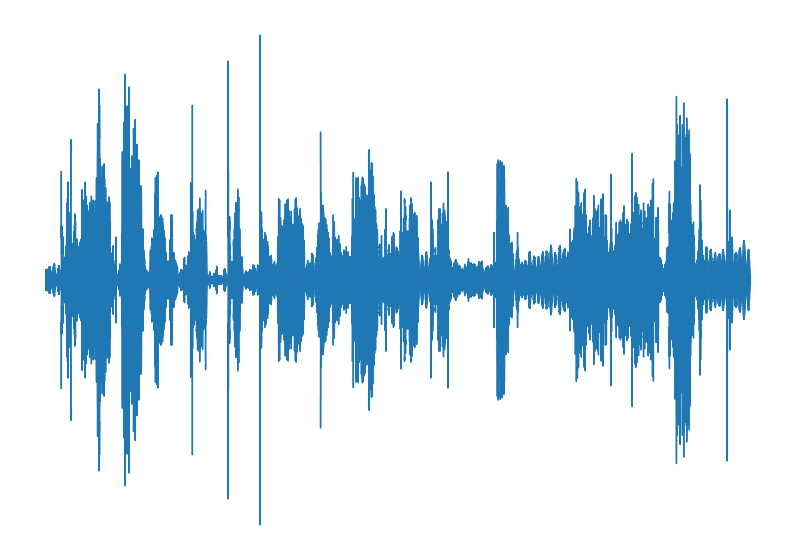

In [87]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(samples, sr=sample_rate)

/home/nicolas/.conda/envs/thesis/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


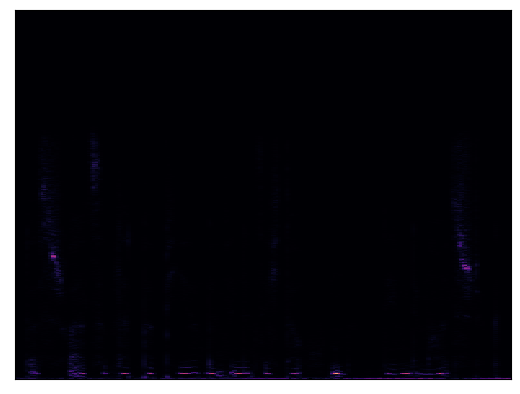

In [88]:
# convert to spectrogram
sgram = librosa.stft(samples, n_fft=2048, hop_length=512)
librosa.display.specshow(sgram)

/tmp/ipykernel_1770386/29967690.py:2: FutureWarning: Pass y=[-0.0365614  -0.04392435 -0.03795066 ... -0.00020954 -0.00081818
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=64)


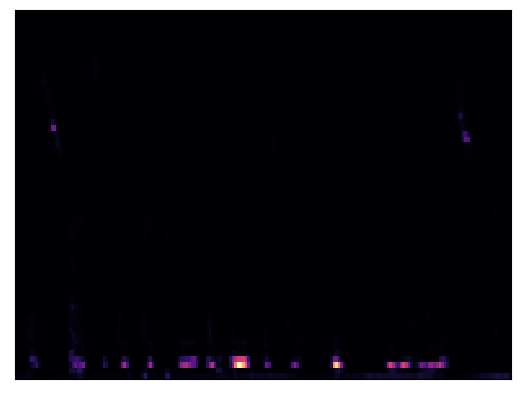

In [89]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=64)
librosa.display.specshow(mel_scale_sgram)

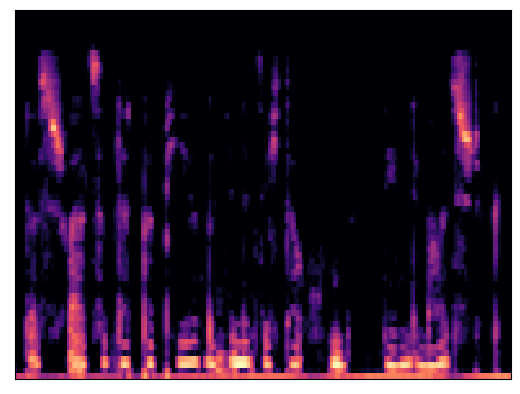

In [90]:
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sample_rate)

# Length analysis

In [39]:
result["length"].describe()

count    2563.000000
mean        3.375415
std         0.924356
min         1.225500
25%         2.885187
50%         3.536854
75%         3.837167
max        13.994667
Name: length, dtype: float64

Let's keep a length equal to 75% of the data, pad the shorter while split the longer. Throw away samples below min lenght

In [94]:
target_l = result["length"].describe()["75%"]
buffer_length = target_l*sr
min_l = result["length"].describe()["min"]

1.2255

In [76]:
min_l = result["length"].describe()["min"]
min_s = result.loc[result['length'] == min_l, "path"]
min_s

375    /datasets/nicolas_facchinetti/EmoDB/data/12a02...
Name: path, dtype: object

In [95]:
short_sample, sr = librosa.load(min_s[375])

In [96]:
padded = librosa.util.pad_center(short_sample, size=buffer_length)
padded, len(padded)/sr

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 3.837142857142857)

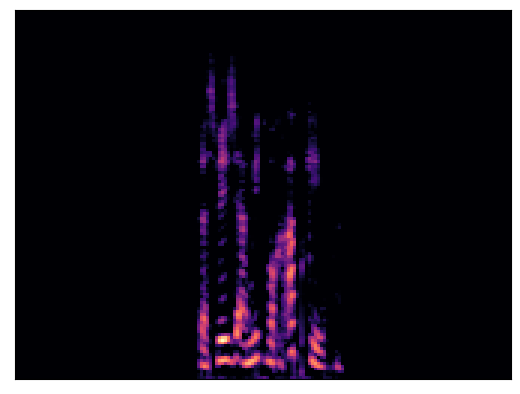

In [104]:
mels = librosa.feature.melspectrogram(y=padded, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
log = librosa.amplitude_to_db(mels, ref=np.min)
librosa.display.specshow(log, sr=sample_rate)

In [81]:
max_l = result["length"].describe()["max"]
max_s = result.loc[result['length'] == max_l, "path"]
max_s

423    /datasets/nicolas_facchinetti/EMOVO/data/m1/tr...
Name: path, dtype: object

In [99]:
long_sample, _ = librosa.load(max_s[423], sr=sr)
long_sample, len(long_sample)/sr

(array([3.5495430e-04, 4.9356360e-04, 1.8817498e-04, ..., 3.8151650e-04,
        1.0554499e-05, 0.0000000e+00], dtype=float32),
 13.99469387755102)

In [100]:
def split_sample(audio, length, minimum):
    samples_total = len(audio)
    samples_wrote = 0
    segments = []
    
    to_process = samples_total - samples_wrote
    while to_process > minimum:
        segment = audio[samples_wrote : (samples_wrote + length)]
        segments.append(segment)
        samples_wrote += length
        to_process = samples_total - samples_wrote
    return segments

In [102]:
splitted = split_sample(long_sample, int(buffer_length), int(min_l))
[len(s)/sr for s in splitted]

[3.837142857142857, 3.837142857142857, 3.837142857142857, 2.483265306122449]

# Dataset processing

Split and pad all the samples to the same length, then extract log Mel-specotrograms from all the samples

In [112]:
result.head()

,path,filename,label,actor,gender,length
0,/datasets/nicolas_facchinetti/EmoDB/data/13a05...,13a05Tc.wav,Sadness,13,f,4.451375
1,/datasets/nicolas_facchinetti/EmoDB/data/14b09...,14b09Ac.wav,Fear,14,f,2.287688
2,/datasets/nicolas_facchinetti/EmoDB/data/11b02...,11b02Na.wav,Neutral,11,m,2.698812
3,/datasets/nicolas_facchinetti/EmoDB/data/09b03...,09b03Fd.wav,Happiness,9,f,3.312500
4,/datasets/nicolas_facchinetti/EmoDB/data/16b10...,16b10Fb.wav,Happiness,16,f,2.583500


In [132]:
def process_audio_files(metadata):
    sgram_list = []
    mod_data = []
    for _, data in metadata.iterrows():
        # load audio data
        path = data["path"]
        samples, _ = librosa.load(path, sr=sr)
        
        # split larger segmtents
        samples = [samples]
        if data["length"] >= buffer_length/sr:
            samples = split_sample(samples[0], int(buffer_length), int(min_l))

        # pad segments
        for num, s in enumerate(samples):
            padded = librosa.util.pad_center(s, size=buffer_length)

            mod_data.append([data["path"], data["filename"], str(num), data["label"], data["actor"], data["gender"]])

            # compute log mel-spectrograms
            mel_scale_sgram = librosa.feature.melspectrogram(y=padded, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
            log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
            sgram_list.append(log_mel_sgram)
            
    df_info_mod = pd.DataFrame(mod_data, columns=['path', 'filename', 'chunk', 'label', 'actor', 'gender'])
    return sgram_list, df_info_mod

In [133]:
elaborated_data = {}
for dataset in frames:
    sgram, df = process_audio_files(frames[dataset])
    
    elaborated_data[dataset] = {"img": sgram, "df":df}

In [175]:
elaborated_data["emovo"]["df"]

,path,filename,chunk,label,actor,gender
0,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-l1.wav,0,gioia,m3,m
1,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-l1.wav,1,gioia,m3,m
2,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-b3.wav,0,gioia,m3,m
3,/datasets/nicolas_facchinetti/EMOVO/data/m3/pa...,pau-m3-n5.wav,0,paura,m3,m
4,/datasets/nicolas_facchinetti/EMOVO/data/m3/pa...,pau-m3-n5.wav,1,paura,m3,m
...,...,...,...,...,...,...
739,/datasets/nicolas_facchinetti/EMOVO/data/m2/so...,sor-m2-d1.wav,0,sorpresa,m2,m
740,/datasets/nicolas_facchinetti/EMOVO/data/m2/pa...,pau-m2-b3.wav,0,paura,m2,m
741,/datasets/nicolas_facchinetti/EMOVO/data/m2/tr...,tri-m2-n2.wav,0,tristezza,m2,m
742,/datasets/nicolas_facchinetti/EMOVO/data/m2/ra...,rab-m2-l1.wav,0,rabbia,m2,m


In [176]:
# save image to local drive
for dataset in frames:
    image_metadata = []
    df = elaborated_data[dataset]["df"]
    for count, sample in enumerate(elaborated_data[dataset]["img"]):
        # label and filename
        label = df.iloc[count]["label"]
        chunk = df.iloc[count]["chunk"]
        file = df.iloc[count]["filename"]
        
        path = f'/datasets/nicolas_facchinetti/processed_data/{dataset}/images/{label}/'
        if not os.path.exists(path):
            os.makedirs(path)
        
        filename = f'/datasets/nicolas_facchinetti/processed_data/{dataset}/images/{label}/{file}_{chunk}.png'
        # save image to local drive
        img = librosa.display.specshow(sample, sr=sr, n_fft=2048, hop_length=512)
        plt.savefig(filename)
        plt.clf()
        image_metadata.append(filename)
    elaborated_data[dataset]["df"]["img_path"] = image_metadata

<Figure size 640x480 with 0 Axes>

In [177]:
elaborated_data["emovo"]["df"]

,path,filename,chunk,label,actor,gender,img_path
0,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-l1.wav,0,gioia,m3,m,/datasets/nicolas_facchinetti/processed_data/e...
1,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-l1.wav,1,gioia,m3,m,/datasets/nicolas_facchinetti/processed_data/e...
2,/datasets/nicolas_facchinetti/EMOVO/data/m3/gi...,gio-m3-b3.wav,0,gioia,m3,m,/datasets/nicolas_facchinetti/processed_data/e...
3,/datasets/nicolas_facchinetti/EMOVO/data/m3/pa...,pau-m3-n5.wav,0,paura,m3,m,/datasets/nicolas_facchinetti/processed_data/e...
4,/datasets/nicolas_facchinetti/EMOVO/data/m3/pa...,pau-m3-n5.wav,1,paura,m3,m,/datasets/nicolas_facchinetti/processed_data/e...
...,...,...,...,...,...,...,...
739,/datasets/nicolas_facchinetti/EMOVO/data/m2/so...,sor-m2-d1.wav,0,sorpresa,m2,m,/datasets/nicolas_facchinetti/processed_data/e...
740,/datasets/nicolas_facchinetti/EMOVO/data/m2/pa...,pau-m2-b3.wav,0,paura,m2,m,/datasets/nicolas_facchinetti/processed_data/e...
741,/datasets/nicolas_facchinetti/EMOVO/data/m2/tr...,tri-m2-n2.wav,0,tristezza,m2,m,/datasets/nicolas_facchinetti/processed_data/e...
742,/datasets/nicolas_facchinetti/EMOVO/data/m2/ra...,rab-m2-l1.wav,0,rabbia,m2,m,/datasets/nicolas_facchinetti/processed_data/e...


# Prepare data for models

One-hot encode the labels

In [138]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

for dataset in frames:
    # one-hot encode labels
    df = elaborated_data[dataset]["df"]["label"]
    Y = encoder.fit_transform(np.array(df_label).reshape(-1,1)).toarray()
    elaborated_data[dataset]["y"] = Y
    

In [139]:
elaborated_data["emodb"]["y"]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

Process the images

In [178]:
import tensorflow as tf
img_height = 256
img_width = 256

In [179]:
def process_path_image(file_path):
    # Load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    # Convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # Resize the image to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # Scale pixelin [0,1] interval
    img /= 255.0
    return img

In [182]:
p = process_path_image(elaborated_data[dataset]["df"].iloc[0].img_path)
p.shape, p

2022-10-31 20:27:57.769245: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-31 20:27:57.770180: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:15:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.78GiB deviceMemoryBandwidth: 607.97GiB/s
2022-10-31 20:27:57.770297: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-31 20:27:57.770345: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-10-31 20:27:57.770381: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-10-31 20:27:57.770415: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2022

(TensorShape([256, 256, 3]),
 <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
 array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1

In [184]:
for dataset in frames:
    X = np.array([process_path_image(f) for f in elaborated_data[dataset]["df"].img_path])
    elaborated_data[dataset]["x"] = X

In [185]:
elaborated_data["emodb"]["x"].shape

(604, 256, 256, 3)

# Save data

Save data for future computations

In [186]:
for dataset in frames:
    x = elaborated_data[dataset]["x"]
    y = elaborated_data[dataset]["y"]
    df = elaborated_data[dataset]["df"]
    
    np.save(f'/datasets/nicolas_facchinetti/processed_data/{dataset}/x_im.npy', X_image)
    np.save(f'/datasets/nicolas_facchinetti/processed_data/{dataset}/y_im.npy', Y)
    df.to_csv(f"/datasets/nicolas_facchinetti/processed_data/{dataset}/mod_metadata.csv", index=False)